<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/LinearRegression/23_StudyHousePriceRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/5.2-house_price_regression_dataset.csv')

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [ ]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
df.shape

(1000, 8)

In [ ]:
df['House_Price'] = df['House_Price']/1000000

In [ ]:
df['House_Price'].head()

,House_Price
0,0.262383
1,0.985261
2,0.777977
3,0.229699
4,1.041741


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

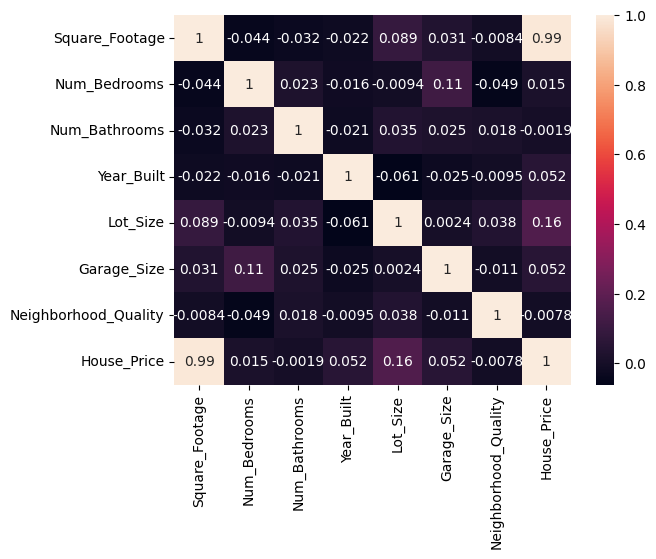

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

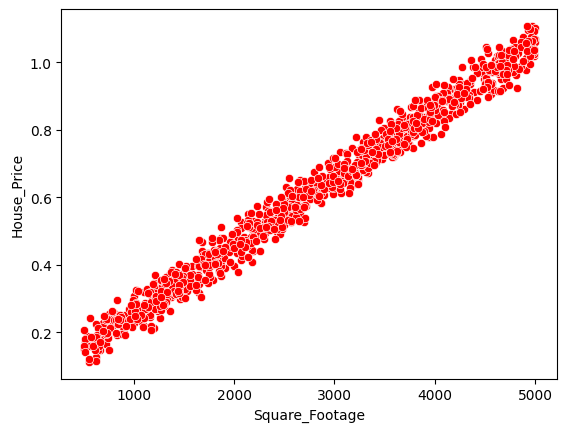

In [ ]:
sns.scatterplot(x="Square_Footage",y="House_Price",data=df,color="r")
plt.show()

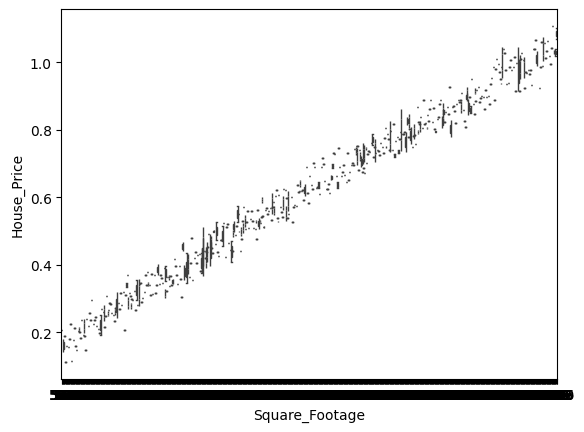

In [ ]:
sns.boxplot(x="Square_Footage",y="House_Price",data=df)
plt.show()

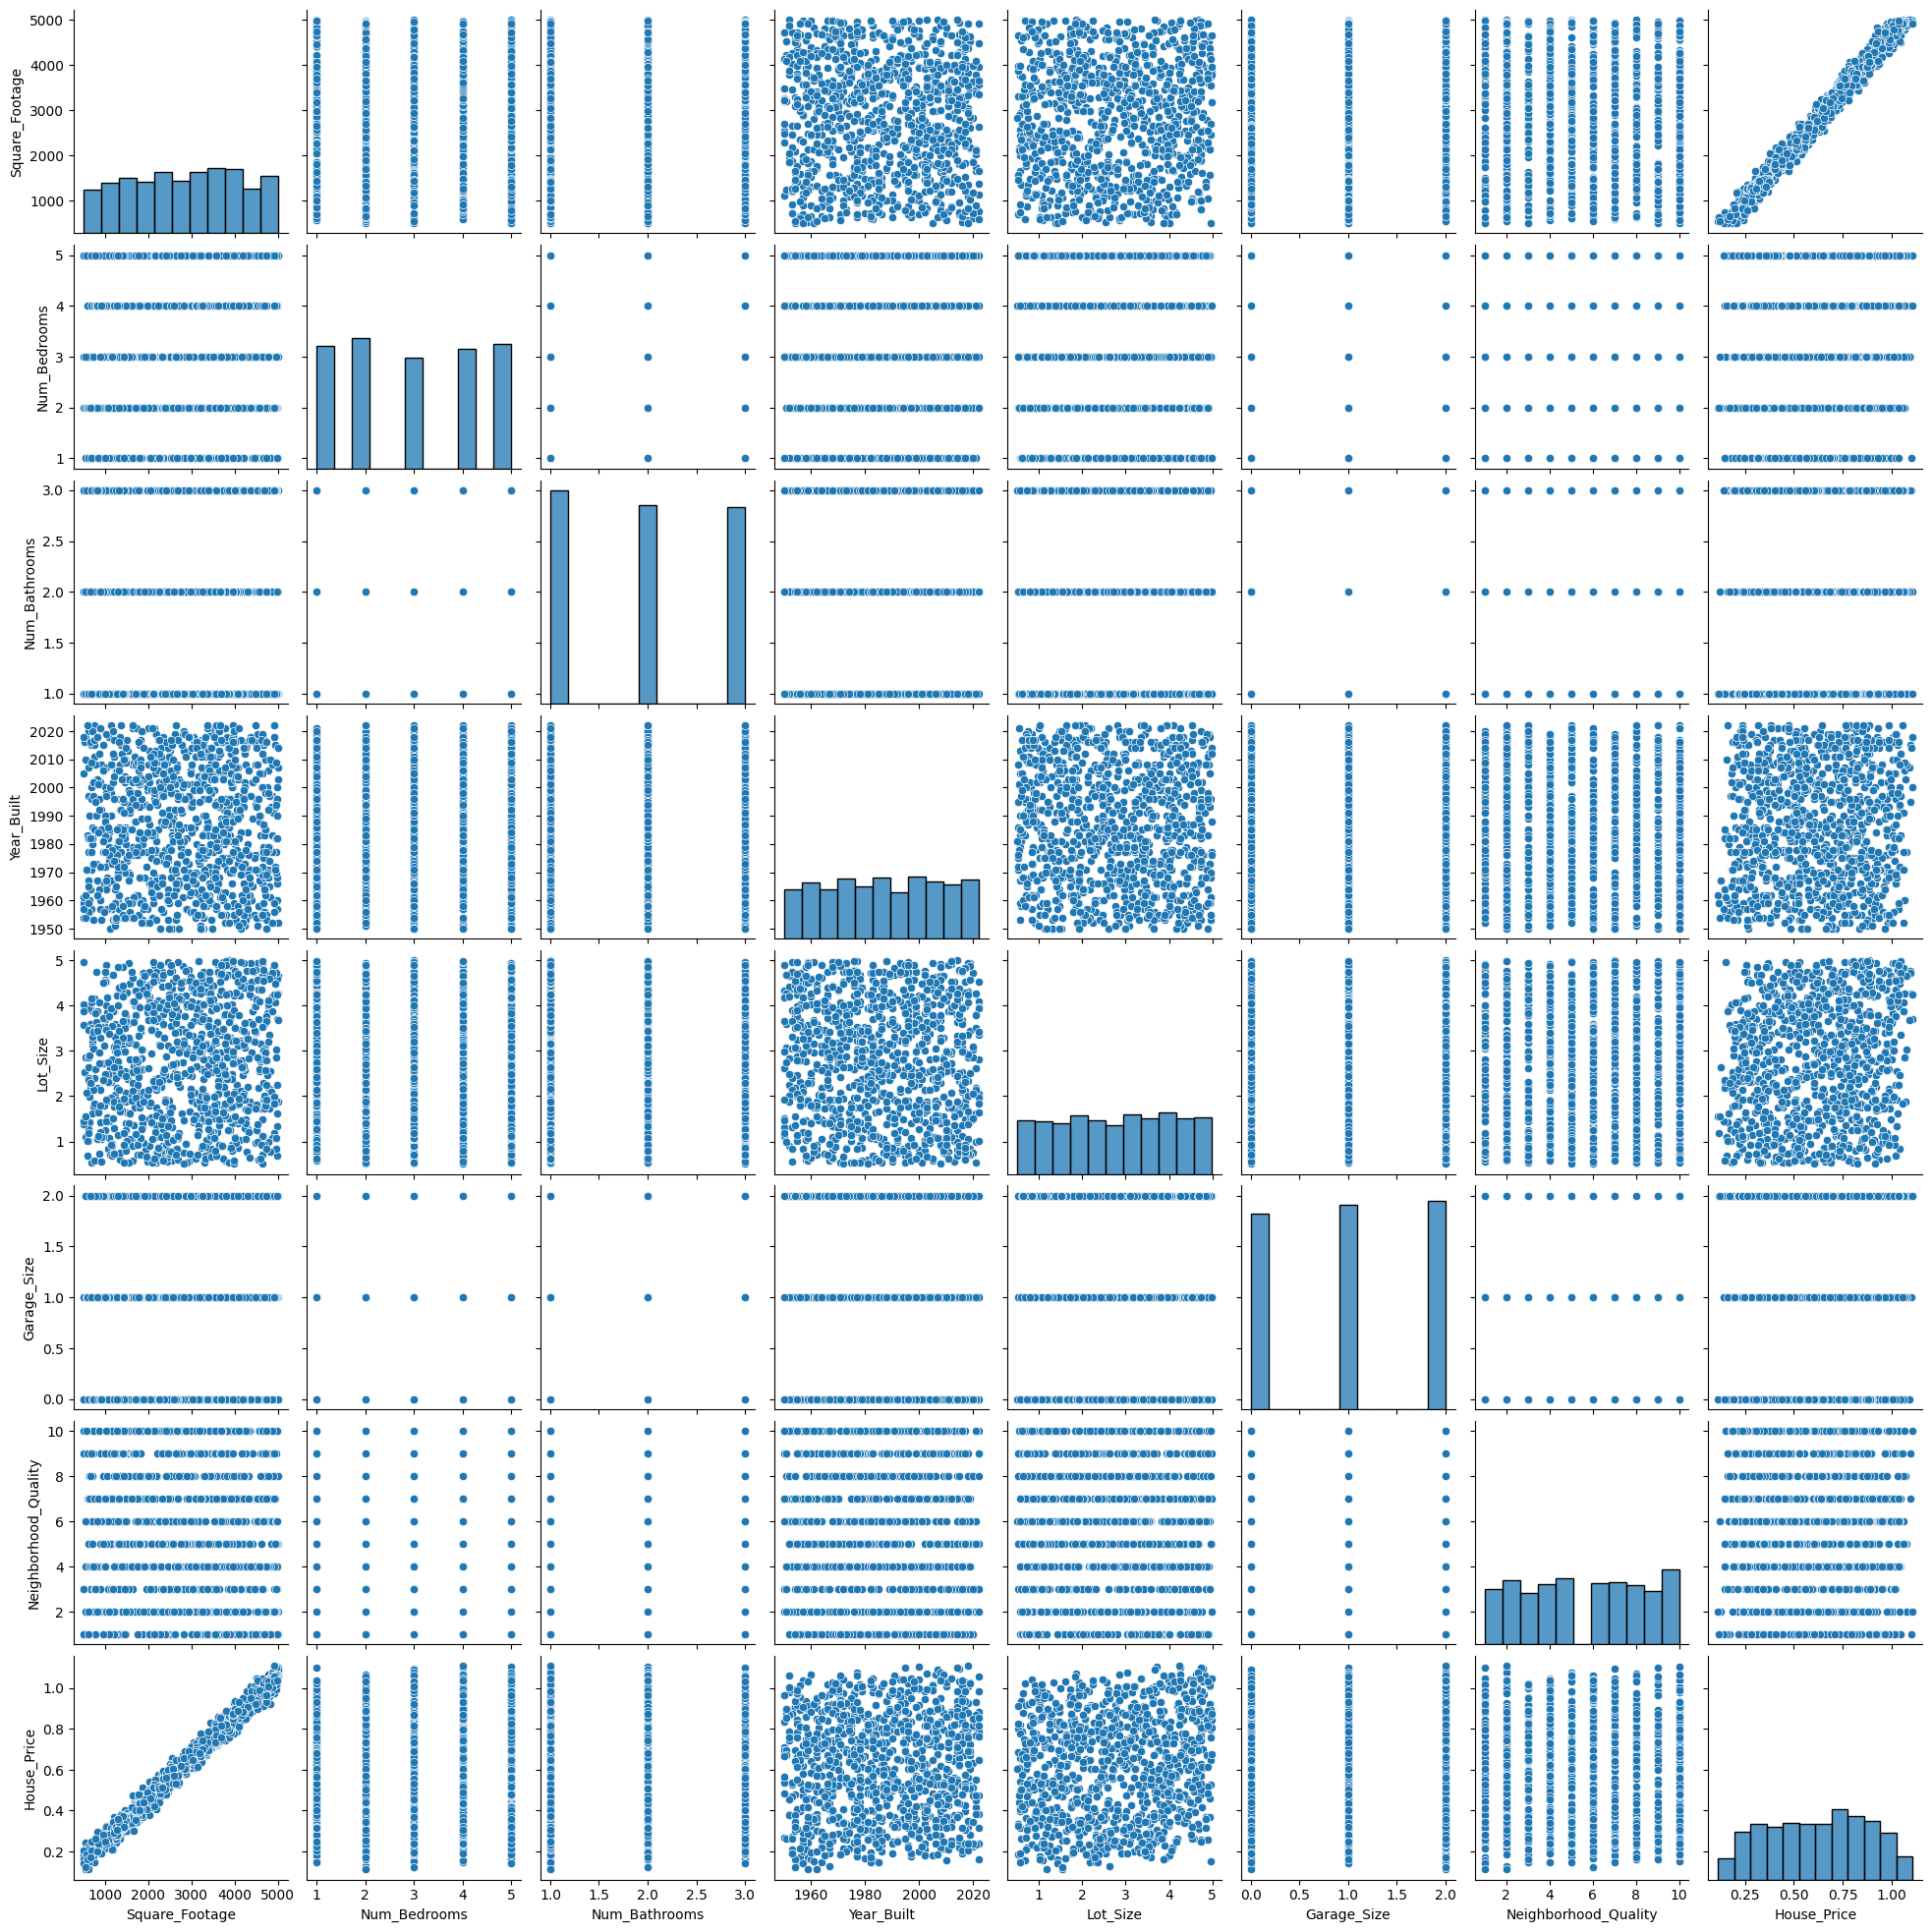

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,0.262383
1,4272,3,3,2016,4.753014,1,6,0.985261
2,3592,1,2,2016,3.634823,0,9,0.777977
3,966,1,2,1977,2.730667,1,8,0.229699
4,4926,2,1,1993,4.699073,0,8,1.041741


In [ ]:
X=df.drop('House_Price',axis=1)
y=df['House_Price']

In [ ]:
X.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


In [ ]:
y.head()

,House_Price
0,0.262383
1,0.985261
2,0.777977
3,0.229699
4,1.041741


In [ ]:
# train - test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [ ]:
y_test.describe()

,House_Price
count,250.000000
mean,0.628154
std,0.245821
min,0.140538
25%,0.441296
50%,0.632582
75%,0.818998
max,1.099212


In [ ]:
X_train.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
Square_Footage,1.000000,-0.044842,-0.005007,-0.022994,0.111174,0.034094,0.001082
Num_Bedrooms,-0.044842,1.000000,-0.000139,0.004878,-0.036229,0.119145,-0.050968
Num_Bathrooms,-0.005007,-0.000139,1.000000,-0.006880,0.021432,0.024609,0.044470
Year_Built,-0.022994,0.004878,-0.006880,1.000000,-0.056584,-0.024240,-0.015482
Lot_Size,0.111174,-0.036229,0.021432,-0.056584,1.000000,-0.007910,0.004373
Garage_Size,0.034094,0.119145,0.024609,-0.024240,-0.007910,1.000000,-0.013611
Neighborhood_Quality,0.001082,-0.050968,0.044470,-0.015482,0.004373,-0.013611,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

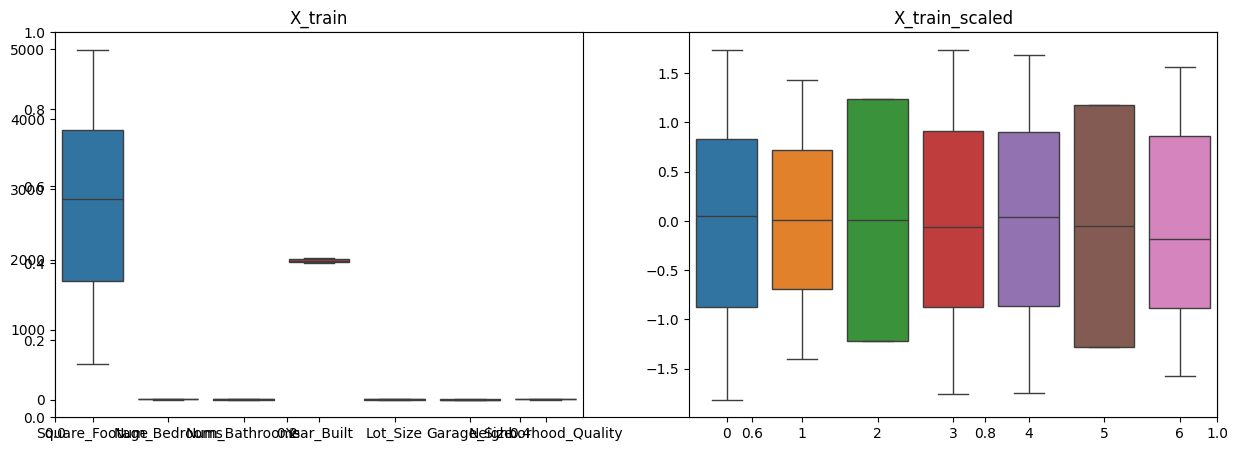

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train_scaled")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(X_train_scaled,y_train)


LinearRegression()

In [ ]:
y_pred = linear.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Mean Absolute Error :  0.0073890534841376514
Mean Squarred Error :  8.705549718318304e-05
R2 SCORE :    0.9985535618636783


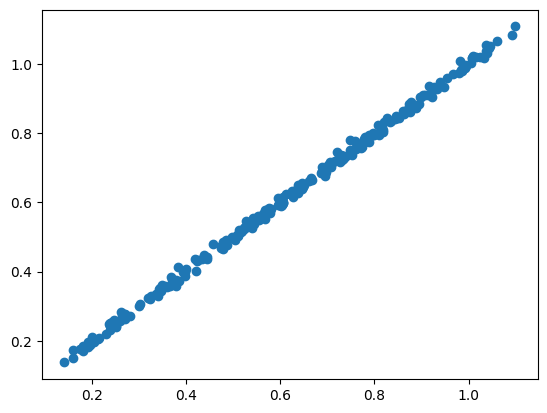

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()

Mean Absolute Error :  0.20687738539191844
Mean Squarred Error :  0.06033963881990807
R2 SCORE :    -0.002550758366777872


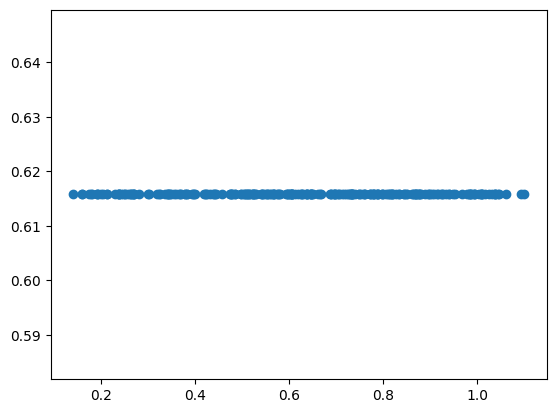

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean Absolute Error : ",mae)
print("Mean Squarred Error : ",mse)
print("R2 SCORE :   ",score)
plt.scatter(y_test,y_pred)
plt.show()